In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv("data/aoti_data.csv")
print(data.shape)
data.head()

(35064, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [3]:
data_new = data.drop(columns=['month', 'day', 'hour', 'No'])
print(data_new.shape)
data_new.head()

(35064, 14)


,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
data_new.isnull().sum()

year          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [5]:
data_new.isna().sum()

year          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [6]:
data_new.dropna(inplace=True)
print(data_new.shape)

(31815, 14)


In [7]:
data_new.describe()

,year,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,31815.000000,31815.00000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000,31815.000000
mean,2014.714914,81.86363,109.120685,17.167205,58.976332,1256.574729,56.240938,13.775611,1011.800385,3.241106,0.068235,1.720471
std,1.162536,80.44949,93.718017,22.760801,37.061384,1223.301208,57.834314,11.369035,10.338869,13.667863,0.837489,1.204240
min,2013.000000,3.00000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,2014.000000,22.00000,37.000000,3.000000,30.000000,500.000000,8.000000,3.400000,1003.300000,-8.000000,0.000000,0.900000
50%,2015.000000,58.00000,86.000000,8.000000,53.000000,800.000000,42.000000,14.800000,1011.200000,4.000000,0.000000,1.400000
75%,2016.000000,114.00000,154.000000,21.000000,82.000000,1500.000000,82.000000,23.400000,1020.000000,15.700000,0.000000,2.200000
max,2017.000000,713.00000,948.000000,229.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,46.400000,11.200000


### Line plot for different covariates according to years

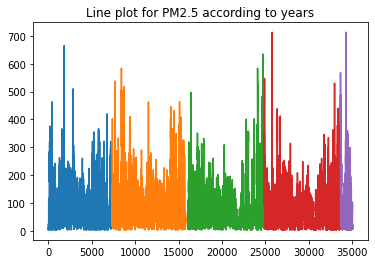

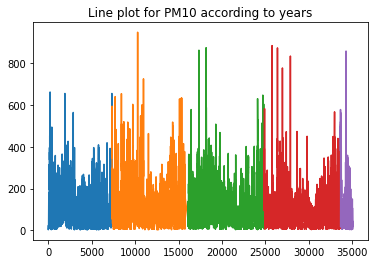

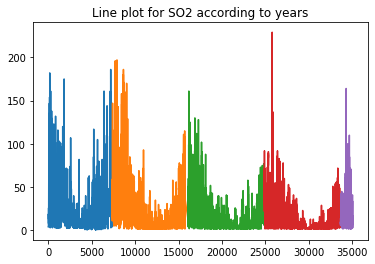

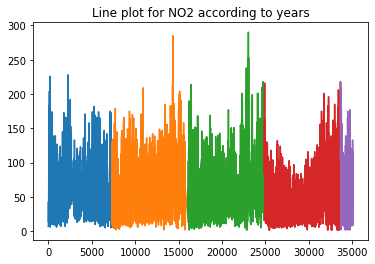

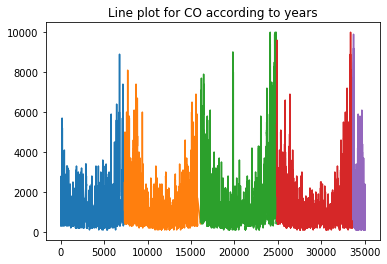

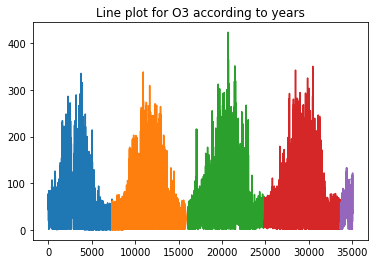

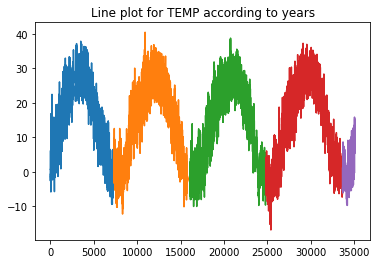

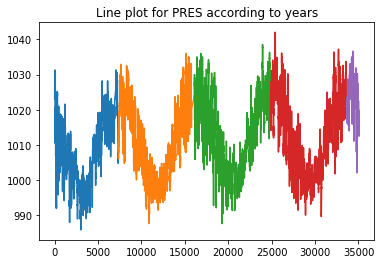

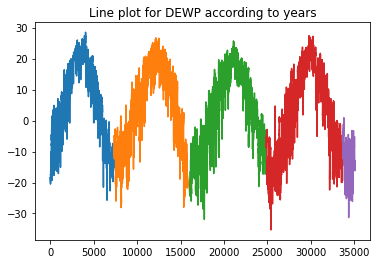

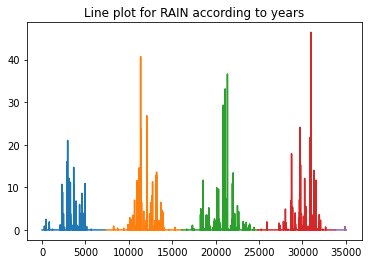

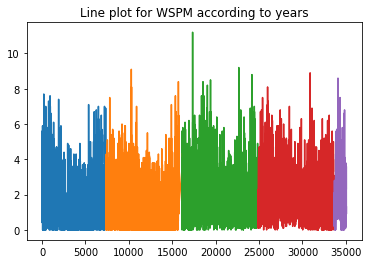

In [8]:
columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES',
                    'DEWP', 'RAIN', 'WSPM']
for col in columns_to_plot:
    data_new.groupby('year')[col].plot()
    plt.title(f"Line plot for {col} according to years")
    figure_name = "Figure_" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

### Mean and Median for different covariates according to years

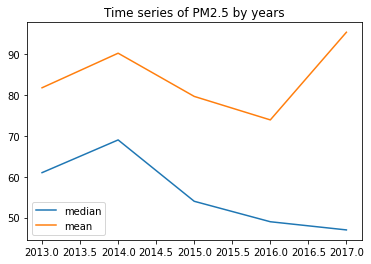

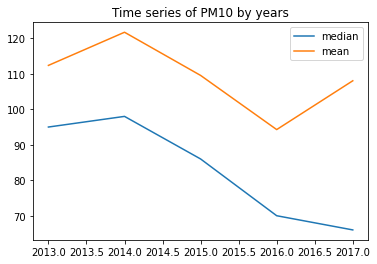

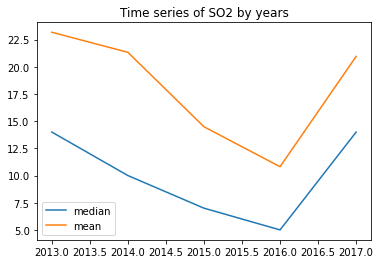

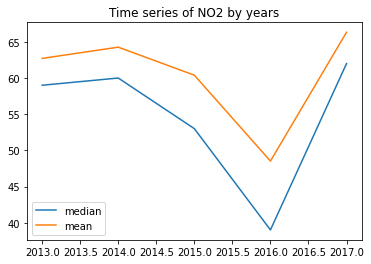

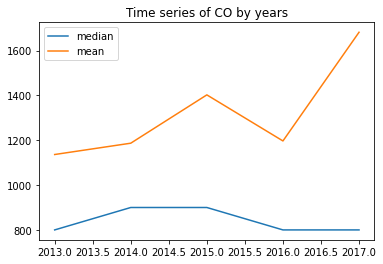

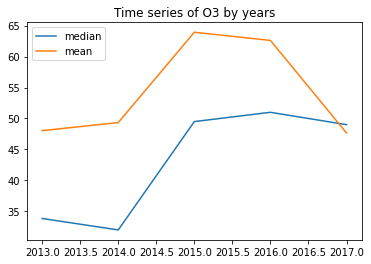

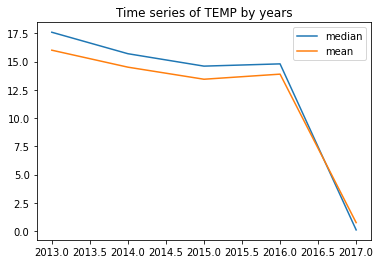

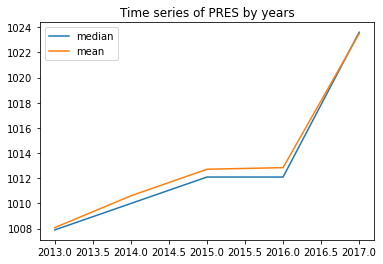

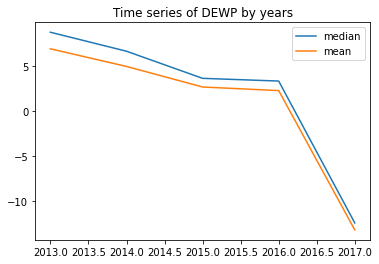

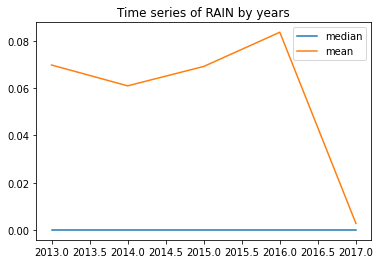

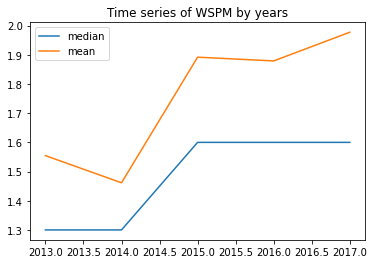

In [9]:
for col in columns_to_plot:
    plt.plot(data_new.groupby('year')[col].median(), label="median")
    plt.plot(data_new.groupby('year')[col].mean(), label="mean")
    plt.legend()
    figure_name = "Mean_median" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.title(f"Time series of {col} by years")
    plt.show()

### Histogram for different covariates

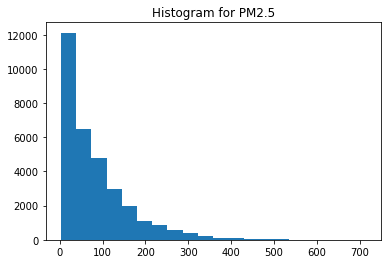

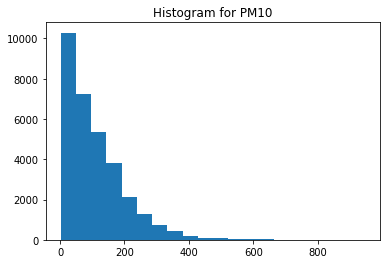

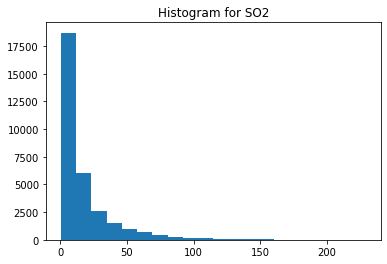

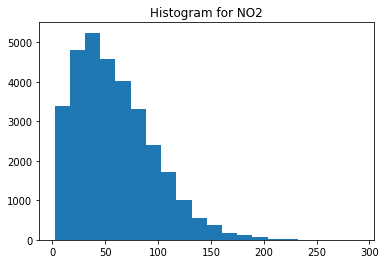

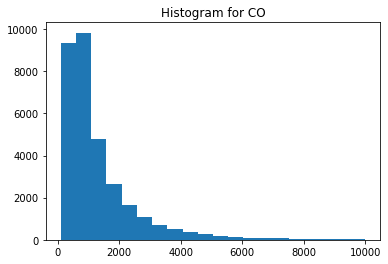

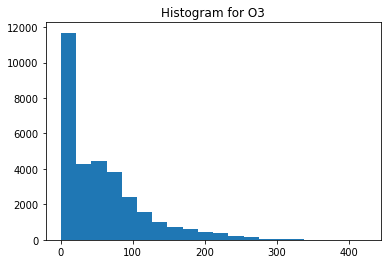

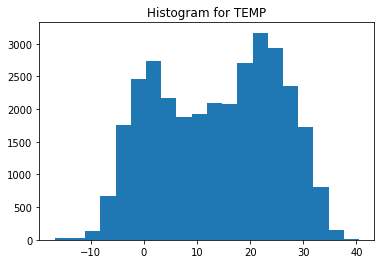

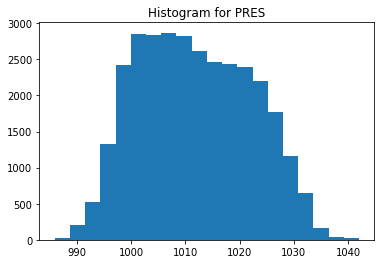

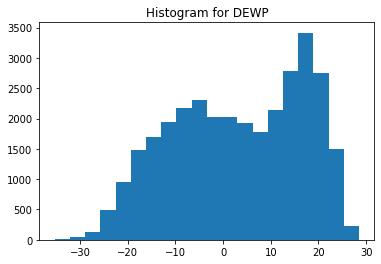

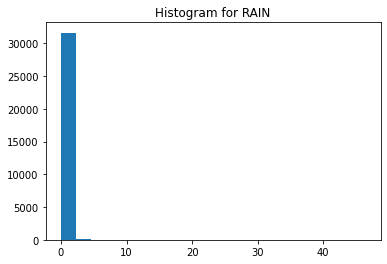

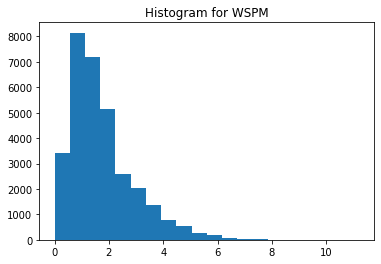

In [10]:
## histograms for all variables
for col in columns_to_plot:
    pd.DataFrame(data_new[col]).hist(bins=20)
    plt.grid(False)
    plt.title(f"Histogram for {col}")
    figure_name = "Histogram_" + str(col)
    plt.savefig(f"EDA_figures/{figure_name}.pdf", format="pdf", bbox_inches="tight")
    plt.show()

### Heatmap for different covariates

<ipython-input-13-9bd73f2de193>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_new.corr(), annot=True)


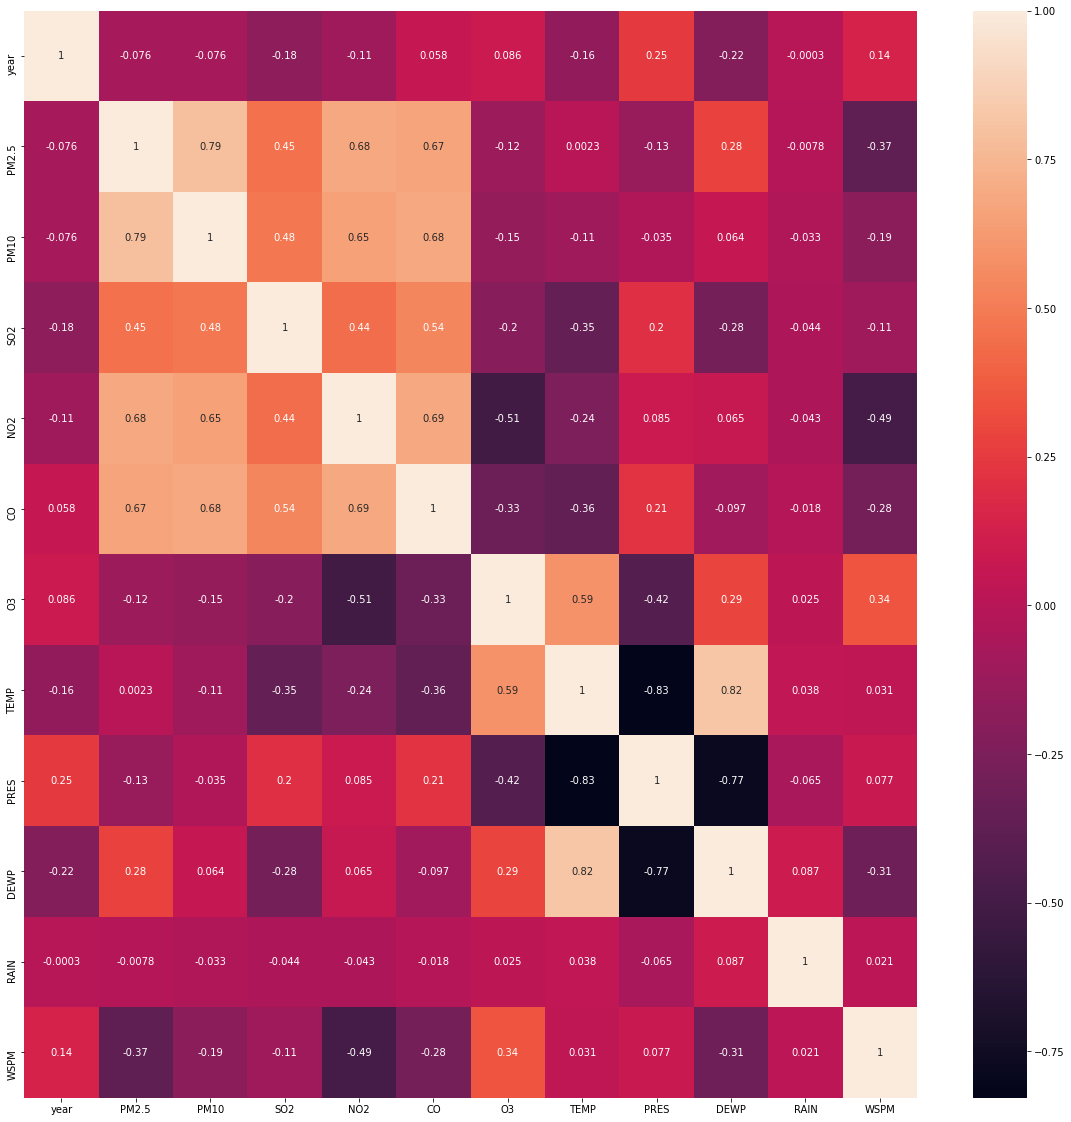

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(data_new.corr(), annot=True)
plt.savefig(f"EDA_figures/heatmap.pdf", format="pdf", bbox_inches="tight")

### Data Preprocessing

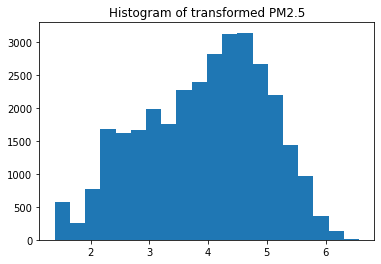

In [12]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


data_new['PM2.5'] = np.log1p(data_new['PM2.5'])
pd.DataFrame(data_new['PM2.5']).hist(bins=20)
plt.title("Histogram of transformed PM2.5")
plt.grid(False)
plt.show()


In [14]:
drop_columns = ['year', 'wd', 'station', 'PM2.5']
X = data_new.drop(columns=drop_columns, axis=1)
y = data_new['PM2.5']

## data transformation / standardization
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X.head()

,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Convert the numpy arrays to pandas DataFrames
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Export the DataFrames to CSV files
X_train_df.to_csv("data/X_train.csv", index=False)
X_test_df.to_csv("data/X_test.csv", index=False)
y_train_df.to_csv("data/y_train.csv", index=False)
y_test_df.to_csv("data/y_test.csv", index=False)